# Importing Libraries 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
train=pd.read_csv("S:\\Desktop\\New folder\\Data Science\\titanic\\train.csv",encoding='unicode_escape')
df=train.copy()
test=pd.read_csv("S:\\Desktop\\New folder\\Data Science\\titanic\\test.csv",encoding='unicode_escape')
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis

In [14]:
print(df.shape) 
df.head()
print(test.shape) 
test.head()

(891, 12)
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [24]:
df.describe().style.background_gradient(cmap="Purples")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [27]:
test.describe().style.background_gradient(cmap="Purples")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [29]:
test.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [44]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

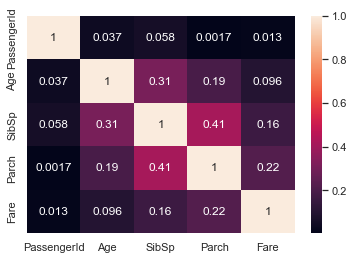

In [47]:
plt.figure()
sns.heatmap(df.corr().abs(),annot=True)

In [49]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Probability of survival')

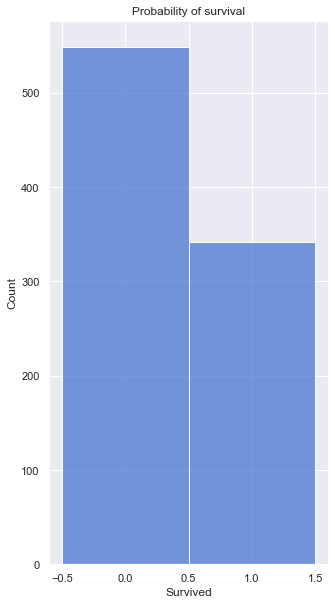

In [56]:
plt.figure(figsize=(5,10))
sns.histplot(df.Survived);
plt.title('Probability of survival')

In [59]:
fare_class_cabin = df[['Pclass', 'Fare', 'Cabin']]
fare_class_cabin.Cabin.fillna('missing', inplace=True)
for i in range(len(fare_class_cabin)):
    if fare_class_cabin.Cabin.iloc[i] == 'missing':
        fare_class_cabin.Cabin.iloc[i] = 0
    else:
        fare_class_cabin.Cabin.iloc[i] = 1
        
fare_class_cabin.Cabin = fare_class_cabin.Cabin.astype('int')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

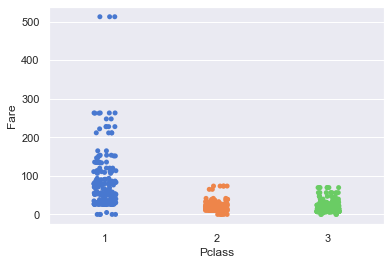

In [60]:
sns.stripplot(x='Pclass', y='Fare', data=fare_class_cabin)

In [66]:
pd.crosstab(fare_class_cabin.Cabin, fare_class_cabin.Pclass)

Pclass,1,2,3
Cabin,,,
0,40,168,479
1,176,16,12


In [68]:
pd.crosstab(fare_class_cabin.Cabin, df.Survived)

Survived,0,1
Cabin,,
0,481,206
1,68,136


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

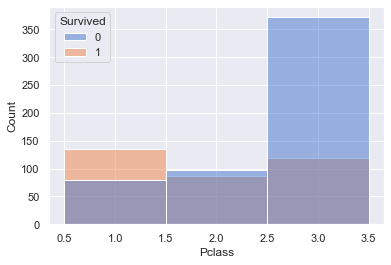

In [70]:
plt.figure();
sns.histplot(x=fare_class_cabin.Pclass, hue=df.Survived)

In [73]:
#Sex
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0.5, 1.0, 'relation of sex and survival')

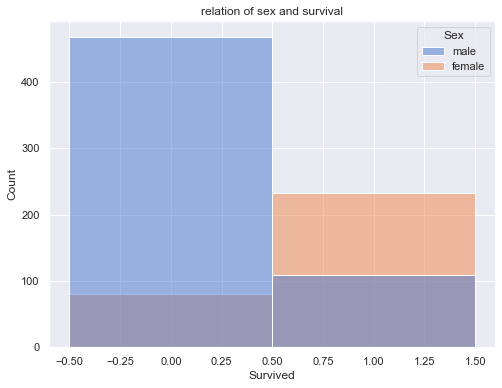

In [74]:
plt.figure(figsize=(8,6))
sns.histplot(hue=df.Sex, x=df.Survived)
plt.title('relation of sex and survival')

<AxesSubplot:xlabel='Age', ylabel='Density'>

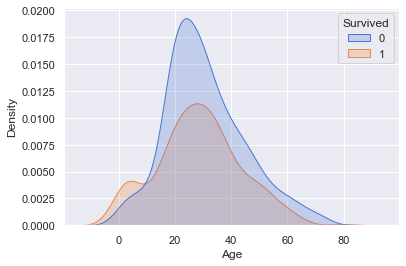

In [75]:
plt.figure()
sns.kdeplot(data=df, x = 'Age',hue='Survived', fill=True)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

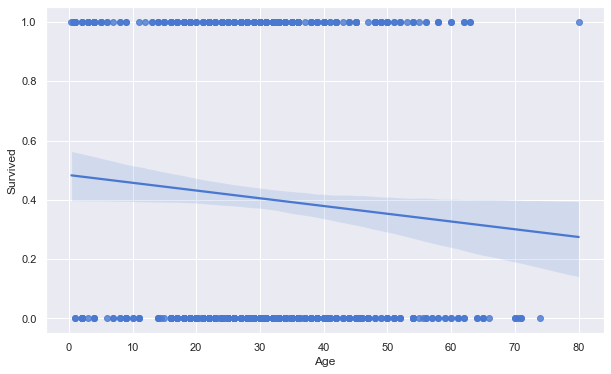

In [77]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, x='Age', y = 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

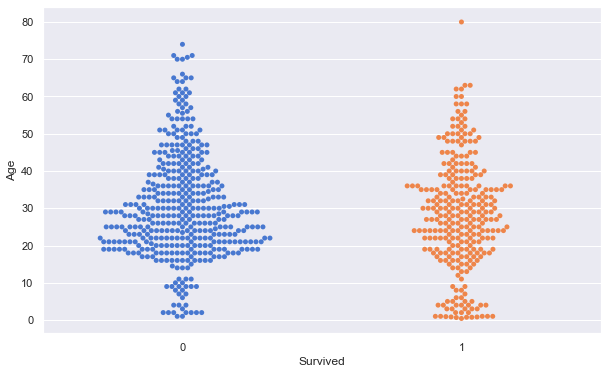

In [78]:
plt.figure(figsize=(10,6))
sns.swarmplot(data = df, x='Survived', y = 'Age')

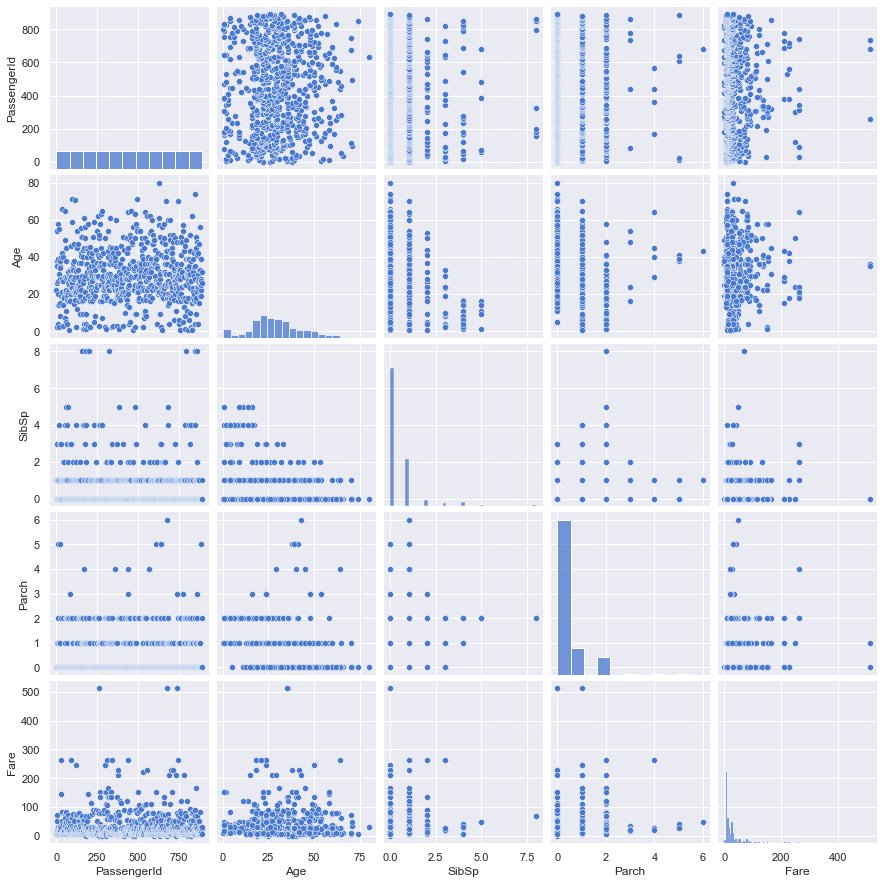

In [79]:
sns.pairplot(df, kind="scatter")

<AxesSubplot:>

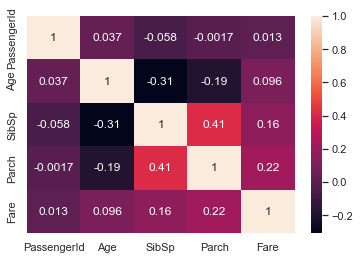

In [80]:
sns.heatmap(df.corr() , annot = True)

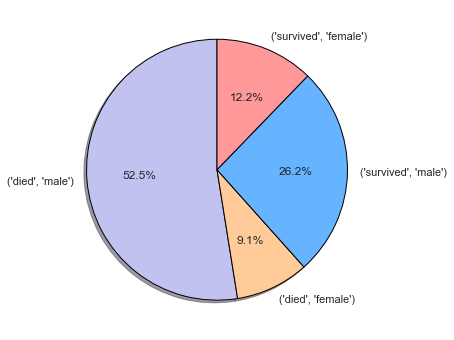

In [82]:
# Survival percentages of passengers by gender

labels = [("died", "male"),
          ("died", "female"),
          ("survived", "male"),
          ("survived", "female")]
sizes = survived_sex.values
colors = ['#c2c2f0', '#ffcc99', '#66b3ff', '#ff9999']
# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.show()

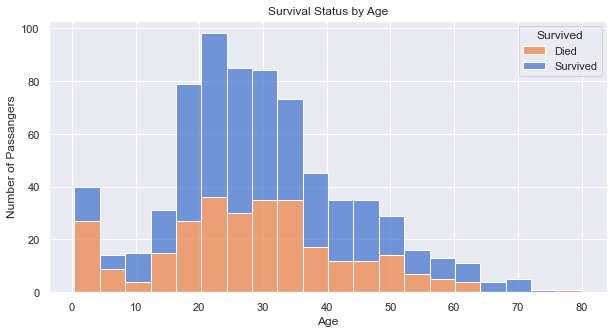

In [83]:
plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", common_norm=False)
plt.xlabel('Age')
plt.ylabel('Number of Passangers')
plt.title('Survival Status by Age')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

### Death percentage of passenger based on their ticket class

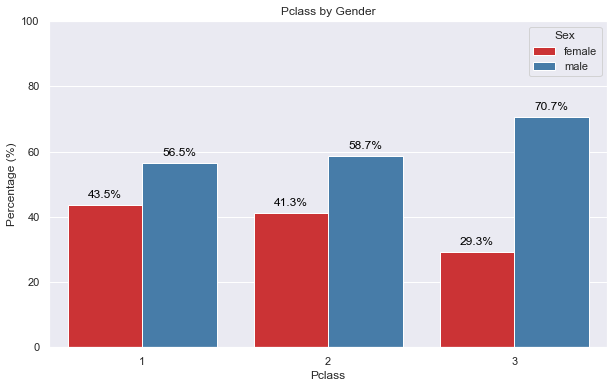

In [89]:
data = {
    'Pclass': [1, 1, 2, 2, 3, 3],
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Count': [122, 94, 108, 76, 347, 144]
}

# Convert the data into a DataFrame
data_f = pd.DataFrame(data)

# Group the data by 'Pclass' and 'Sex', then calculate the total passenger count
grouped_data = data_f.groupby(['Pclass', 'Sex'])['Count'].sum().reset_index()

# Calculate the total passenger count for each Pclass
total_passengers = grouped_data.groupby('Pclass')['Count'].transform('sum')

# Calculate the percentage of passengers and add it to the DataFrame
grouped_data['Percentage'] = (grouped_data['Count'] / total_passengers) * 100

# Create a bar plot using sns.barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Pclass', y='Percentage', hue='Sex', palette='Set1')

# Add percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
plt.xlabel('Pclass')
plt.ylabel('Percentage (%)')
plt.title('Pclass by Gender')

# Set the Y axis limit to 100
plt.ylim(0, 100)

# Show the plot
plt.show()

#### Family (Siblings & Parents)

In [92]:
pd.crosstab(df.SibSp, df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [94]:
pd.crosstab(df.Parch, df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [97]:
df['Family'] = df.SibSp + df.Parch
test['Family'] = test.SibSp + test.Parch
pd.crosstab(tdf.Family, df.Survived)

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [100]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


passenger from port C are more likely to survive

# Modelling

In [109]:
df = train.copy()

In [110]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [111]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
